# K Vizinhos Mais Próximos


In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler


bc = datasets.load_breast_cancer()

X = pd.DataFrame(bc.data)
y = bc.target


In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

## Vamos aplicar um hold out

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.028845e-15,-1.902442e-15,5.065741e-16,4.920687e-16,1.238540e-15,-2.588661e-16,-7.431242e-16,-5.657116e-16,-1.615123e-15,8.182176e-15,4.860713e-16,2.508462e-16,-9.477344e-17,-3.277668e-17,-7.743666e-16,-2.321631e-16,9.107734e-17,1.473138e-15,-4.407418e-16,2.825246e-16,5.149426e-16,3.191194e-16,8.982206e-17,-6.546968e-16,1.608987e-15,2.630503e-16,-5.199637e-16,-2.111655e-16,2.535102e-15,-3.307516e-15
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.001773e+00,-2.067170e+00,-1.961678e+00,-1.442895e+00,-3.150992e+00,-1.646127e+00,-1.139768e+00,-1.259344e+00,-2.830713e+00,-1.881640e+00,-1.071243e+00,-1.518610e+00,-1.065251e+00,-7.774925e-01,-1.727393e+00,-1.331994e+00,-1.165925e+00,-1.963083e+00,-1.596403e+00,-1.148496e+00,-1.728200e+00,-2.168933e+00,-1.696819e+00,-1.246893e+00,-2.729859e+00,-1.459442e+00,-1.314104e+00,-1.735998e+00,-2.284590e+00,-1.644461e+00
25%,-6.729329e-01,-7.527268e-01,-6.876976e-01,-6.484973e-01,-7.230281e-01,-7.436771e-01,-7.787027e-01,-7.458702e-01,-6.910399e-01,-6.846772e-01,-6.315484e-01,-6.434321e-01,-6.129132e-01,-5.160702e-01,-6.181728e-01,-7.059684e-01,-6.218609e-01,-6.514927e-01,-6.874268e-01,-6.060518e-01,-6.597558e-01,-7.534191e-01,-6.750692e-01,-6.404544e-01,-7.171164e-01,-6.892479e-01,-7.647961e-01,-7.757447e-01,-6.703417e-01,-7.072625e-01
50%,-2.346201e-01,-1.037058e-01,-2.422636e-01,-3.086150e-01,-1.746903e-02,-2.088686e-01,-3.231006e-01,-3.764514e-01,-4.837500e-02,-1.674983e-01,-2.849701e-01,-2.066765e-01,-2.759624e-01,-3.551658e-01,-2.336613e-01,-2.798610e-01,-1.939556e-01,-1.281706e-01,-2.172669e-01,-2.309280e-01,-2.524775e-01,-4.817800e-02,-2.585183e-01,-3.392683e-01,-4.892503e-02,-2.495988e-01,-1.805761e-01,-2.051815e-01,-9.404324e-02,-1.975885e-01
75%,4.923551e-01,6.074056e-01,5.099286e-01,3.809773e-01,6.590994e-01,5.348626e-01,5.427554e-01,5.367683e-01,5.752197e-01,4.803518e-01,2.508203e-01,4.327989e-01,2.138346e-01,1.096824e-01,3.185089e-01,4.085215e-01,3.395741e-01,4.995844e-01,4.142772e-01,2.792989e-01,5.567899e-01,6.750925e-01,5.658942e-01,3.954447e-01,6.192663e-01,5.107996e-01,5.707973e-01,7.405606e-01,5.010714e-01,4.931616e-01
max,3.992475e+00,4.704204e+00,4.010873e+00,5.316013e+00,4.877233e+00,4.091902e+00,4.511234e+00,4.000886e+00,3.588307e+00,4.734139e+00,9.195372e+00,6.419657e+00,9.758307e+00,1.149852e+01,7.684859e+00,4.628817e+00,1.016284e+01,4.797991e+00,5.067678e+00,7.434491e+00,3.601328e+00,3.261675e+00,3.498138e+00,4.355039e+00,3.951148e+00,5.339519e+00,4.975179e+00,2.733663e+00,5.082579e+00,7.175619e+00


In [ ]:
pd.DataFrame(x_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,1.460820e-16,2.207461e-16,4.061079e-16,2.434700e-16,-2.086051e-15,9.882852e-16,1.066398e-16,-1.551715e-16,-1.973730e-15,2.709009e-15,-1.477051e-16,-7.719621e-16,1.227089e-16,4.505817e-16,2.363282e-16,-1.541976e-16,5.534884e-16,-7.433949e-17,8.712978e-16,5.702066e-16,-7.089845e-16,2.024047e-16,1.604629e-15,6.038055e-17,5.879394e-16,8.193576e-16,-5.194026e-17,8.438567e-16,-3.882534e-16,-1.757366e-15
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00
min,-1.617690e+00,-2.244692e+00,-1.605888e+00,-1.250392e+00,-2.235721e+00,-1.414791e+00,-1.078700e+00,-1.269897e+00,-1.665035e+00,-1.566358e+00,-9.994344e-01,-1.654617e+00,-9.868481e-01,-6.658689e-01,-1.571835e+00,-1.150029e+00,-9.078367e-01,-1.808145e+00,-1.166512e+00,-9.551708e-01,-1.470056e+00,-2.192901e+00,-1.470432e+00,-1.069521e+00,-2.017215e+00,-1.311889e+00,-1.308440e+00,-1.771411e+00,-1.773735e+00,-1.309260e+00
25%,-7.500955e-01,-6.476054e-01,-7.320236e-01,-7.116033e-01,-7.027807e-01,-7.633158e-01,-7.198417e-01,-7.152189e-01,-7.278683e-01,-7.455169e-01,-6.074800e-01,-7.778218e-01,-6.192317e-01,-4.595562e-01,-6.421810e-01,-6.618154e-01,-4.739800e-01,-6.384030e-01,-5.817207e-01,-5.504004e-01,-7.140690e-01,-6.540925e-01,-7.117079e-01,-6.555240e-01,-6.073871e-01,-6.991492e-01,-7.684723e-01,-7.660469e-01,-6.304861e-01,-6.519314e-01
50%,-2.219450e-01,-5.787655e-02,-2.577808e-01,-3.055215e-01,-6.927473e-02,-2.213593e-01,-4.063438e-01,-4.342456e-01,-1.159436e-01,-2.066339e-01,-3.171871e-01,-1.686885e-01,-2.984956e-01,-3.454287e-01,-1.893968e-01,-2.824479e-01,-2.306501e-01,-1.435360e-01,-2.044916e-01,-2.481483e-01,-3.348844e-01,-4.715413e-03,-3.097289e-01,-3.676825e-01,2.504362e-02,-2.565259e-01,-2.434917e-01,-2.103743e-01,-1.954322e-01,-2.581448e-01
75%,4.475213e-01,5.203790e-01,5.044611e-01,3.447403e-01,6.022210e-01,4.489554e-01,4.782999e-01,6.672151e-01,4.775395e-01,4.936506e-01,3.290902e-01,5.813193e-01,2.752088e-01,1.426611e-01,5.785624e-01,3.398315e-01,2.500217e-01,4.567511e-01,2.855057e-01,2.927238e-01,4.205071e-01,5.861870e-01,4.879703e-01,2.364255e-01,5.712338e-01,4.791058e-01,4.661799e-01,7.280353e-01,3.184665e-01,3.620436e-01
max,3.734901e+00,3.228084e+00,3.840811e+00,5.102198e+00,3.117763e+00,4.195815e+00,3.756732e+00,3.524947e+00,4.045144e+00,4.557672e+00,7.226374e+00,3.434523e+00,7.318405e+00,9.604115e+00,5.561802e+00,5.842120e+00,9.870535e+00,6.412129e+00,6.733320e+00,9.239386e+00,3.846073e+00,3.580708e+00,4.015599e+00,5.309783e+00,3.606080e+00,3.940989e+00,3.848801e+00,2.563147e+00,5.161786e+00,4.473908e+00


## Com essa particao de dados, qual K resolveria esse problema?

In [ ]:
results = []
for k in range(1,50,5):

  knn_clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', algorithm='brute')
  knn_clf.fit(x_train, y_train)

  y_pred = knn_clf.predict(x_test)

  results.append({'k': k,
                  'acc': accuracy_score(y_test, y_pred), 
                  'bal_acc': balanced_accuracy_score(y_test, y_pred)})


df_results = pd.DataFrame(results).set_index('k').sort_values(by='k')


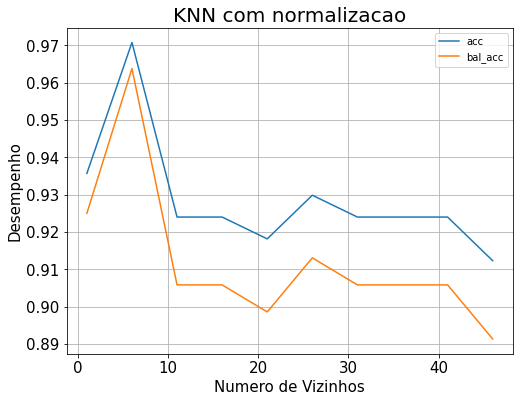

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df_results)
plt.legend(df_results.columns)
plt.grid()
plt.title('KNN com normalizacao', fontsize = 20)
plt.xlabel('Numero de Vizinhos', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Desempenho', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [ ]:
# Melhor K

best_k = df_results['acc'].idxmax()
print('Best K = ', best_k)

df_results.loc[best_k]


Best K =  6


acc        0.970760
bal_acc    0.963768
Name: 6, dtype: float64

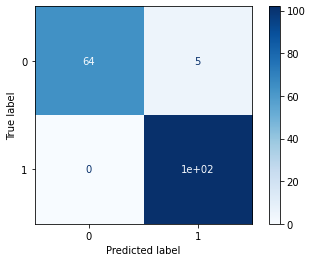

In [ ]:
# Matriz de confusão do melhor K

knn_clf = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='minkowski', algorithm='brute')
knn_clf.fit(x_train, y_train)

y_pred = knn_clf.predict(x_test)
plot_confusion_matrix(knn_clf, x_test, y_test, cmap=plt.cm.Blues)

## E se eu não normalizasse os dados? O resultado seria o mesmo?

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

results = []
for k in range(1,50,5):

  knn_clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', algorithm='brute')
  knn_clf.fit(x_train, y_train)

  y_pred = knn_clf.predict(x_test)

  results.append({'k': k,
                  'acc': accuracy_score(y_test, y_pred), 
                  'bal_acc': balanced_accuracy_score(y_test, y_pred)})


df_results_nn = pd.DataFrame(results).set_index('k').sort_values(by='k')



In [ ]:
df_all = pd.concat([df_results, df_results_nn], axis=1)

col_names = {'acc': ['acc_norm', 'acc'], 'bal_acc': ['bal_acc_norm', 'bal_acc']}
df_all= df_all.rename(columns=lambda c: col_names[c].pop(0) if c in col_names.keys() else c)

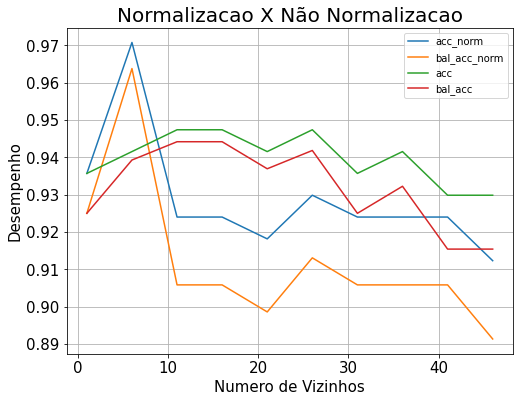

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df_all)
plt.legend(df_all.columns)
plt.grid()
plt.title('Normalizacao X Não Normalizacao', fontsize = 20)
plt.xlabel('Numero de Vizinhos', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Desempenho', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Vocês acabaram de ver o efeito que certas escolhas podem ter nos seus experimentos. 

Comparem agora o desempenho usando diferentes métodos de cálculo de distância com os dados normalizados:

- metric='chebyshev'
- metric='minkowski', p=1  (manhattan)



In [ ]:
knn_clf_chebyshev = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='chebyshev', algorithm='brute')
knn_clf_chebyshev.fit(x_train, y_train)

y_pred = knn_clf.predict(x_test)

In [ ]:
  y_pred = knn_clf_chebyshev.predict(x_test)
  results.append({'k': k,
                  'acc': accuracy_score(y_test, y_pred), 
                  'bal_acc': balanced_accuracy_score(y_test, y_pred)})
df_results = pd.DataFrame(results).set_index('k').sort_values(by='k')
# Melhor K chebyshev
best_k_chebyshev = df_results['acc'].idxmax()
print('Best K = ', best_k_chebyshev)

df_results.loc[best_k_chebyshev]


Best K =  11


acc        0.947368
bal_acc    0.944160
Name: 11, dtype: float64

In [ ]:
knn_clf_minkowski = KNeighborsClassifier(n_neighbors=best_k, p=1, metric='minkowski', algorithm='brute')
knn_clf_minkowski.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)

In [ ]:
  y_pred = knn_clf_minkowski.predict(x_test)

  results.append({'k': k,
                  'acc': accuracy_score(y_test, y_pred), 
                  'bal_acc': balanced_accuracy_score(y_test, y_pred)})


df_results = pd.DataFrame(results).set_index('k').sort_values(by='k')
# Melhor K minkowski

best_k_knn_clf_minkowski = df_results['acc'].idxmax()
print('Best K = ', best_k_knn_clf_minkowski)

df_results.loc[best_k_knn_clf_minkowski]

Best K =  11


acc        0.947368
bal_acc    0.944160
Name: 11, dtype: float64